Date - 19 May 2022

Project by - Anirudh Agarwal

Cohort - August 2021

# Capstone Project

# Healthcare

**Problem Statement:**
* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Dataset Description:**
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
 
**Variables	- Description**
* Pregnancies -	Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure	- Diastolic blood pressure (mm Hg)
* SkinThickness	- Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("/Users/anirudhagarwal/Library/CloudStorage/OneDrive-Personal/Purdue DS Course/Course 8/My Project 2 - Healthcare/health care diabetes.csv")

In [3]:
# Importing the data

df = dataframe.copy()

## Data Exploration

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()               # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Checking the number of null values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Although there are no missing values in the Glucose,BP, Skin thickness, Insulin, BMI columns
# of the dataset, value of 0 indicates missing value

print("Percentage of missing values :")
((df.iloc[:,1:6][df.iloc[:,1:6]==0].count())/df.shape[0])*100

Percentage of missing values :


Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [10]:
null_col = df.iloc[:,1:6].columns.to_list()
null_col

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
# Replacing the null values in the above columns with their respective median

for i in null_col:
    df[i][df[i]==0] = df[df[i]!=0][i].median()    

<ipython-input-11-6f20eebd2c1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]==0] = df[df[i]!=0][i].median()
<ipython-input-11-6f20eebd2c1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]==0] = df[df[i]!=0][i].median()
<ipython-input-11-6f20eebd2c1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]==0] = df[df[i]!=0][i].median()
<ipython-input-11-6f20eebd2c1e>:4: SettingWithCopyWarning: 
A value

In [12]:
# no more 0 values

print("Percentage of missing values :")
((df.iloc[:,1:6][df.iloc[:,1:6]==0].count())/df.shape[0])*100

Percentage of missing values :


Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.dtypes,df.dtypes.value_counts()

(Pregnancies                   int64
 Glucose                       int64
 BloodPressure                 int64
 SkinThickness                 int64
 Insulin                       int64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                           int64
 Outcome                       int64
 dtype: object,
 int64      7
 float64    2
 dtype: int64)

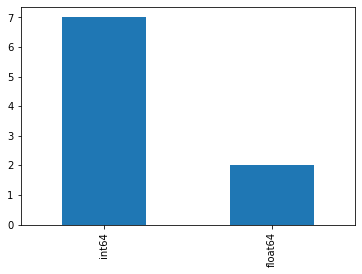

In [15]:
# Created a count (frequency) plot describing the data types and the count of variables.
df.dtypes.value_counts().plot(kind='bar');

In [16]:
# Plotting the count of outcomes by their value
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

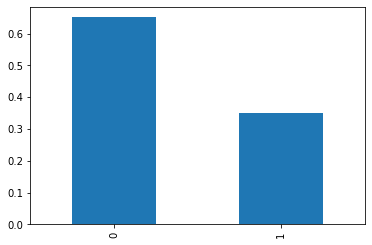

In [17]:
df.Outcome.value_counts(normalize=True).plot(kind='bar');

<Figure size 720x1080 with 0 Axes>

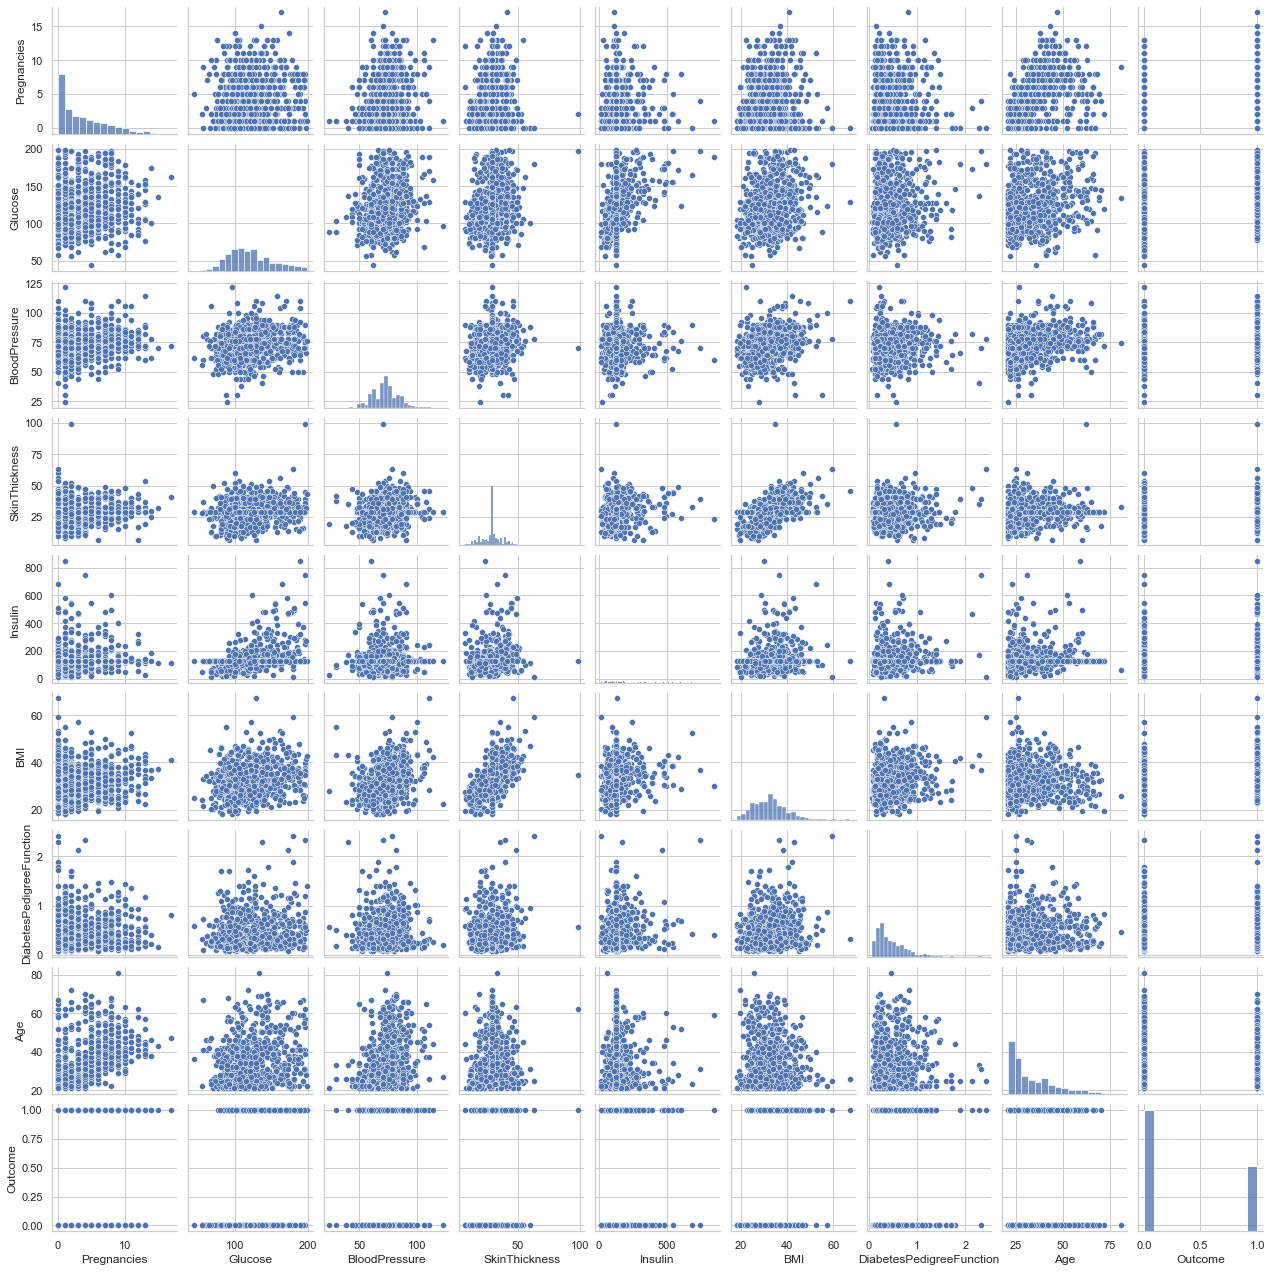

In [18]:
# Scatter plot amongst features

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10,15))
sns.pairplot(df, height=2)
plt.show()

In [19]:
# No strong relationship between different features based on scatter plot. Checking correlation for much detailed analysis


In [20]:
# Correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


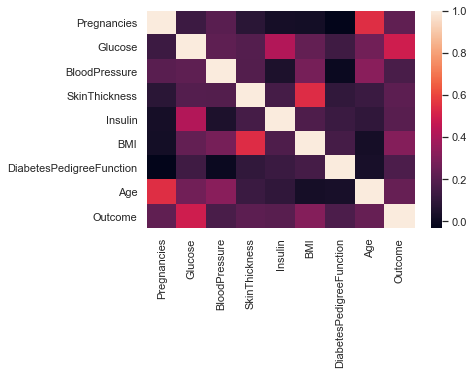

In [21]:
# Plotting the heatmap using seaborn library
sns.heatmap(df.corr());

## Data Modeling

**I will be using different classifier algorithms and logistic regression algorithm
to predict the outcome , since the output is a categorical variable.**

In [22]:
x = df.drop("Outcome", axis=1)
y = df['Outcome']

In [23]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31
2,8,183,64,29,125,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=77,stratify=y)

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

In [30]:
rfc1.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
rfc1.score(x_train,y_train)

1.0

In [32]:
rfc1.score(x_test,y_test)

0.7489177489177489

In [33]:
y_pred = rfc1.predict(x_test)

In [34]:
from sklearn.metrics import classification_report as cr

In [35]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       150
           1       0.69      0.51      0.59        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [36]:
from sklearn.metrics import confusion_matrix as cm

In [37]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,132,18
1,40,41


In [38]:
import numpy as np

In [39]:
# Hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [40]:
# Create the parameter grid
param_grid1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid1)

{'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}


In [41]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [42]:
rfc_gs = GridSearchCV(estimator=rfc1, param_grid=param_grid1, cv=5, verbose=2)
rfc_gs.fit(x_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=22; total time=   0.

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto,

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=auto, m

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, mi

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, 

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, m

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, 

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=sqrt, m

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, 

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, mi

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, 

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_s

[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=auto

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, mi

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_s

[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=aut

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=aut

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=aut

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=a

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=aut

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=aut

[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_feature

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqr

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqr

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqr

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.0s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqr

[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_featur

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=aut

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_feature

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqr

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqr

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_featu

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqr

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqr

[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, max_features

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=au

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=aut

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=aut

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_featur

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=aut

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=aut

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=aut

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_feature

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqr

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqr

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sq

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqr

[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=71; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=6, max_features=sqr

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=a

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=aut

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=aut

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=aut

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=aut

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqr

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_feature

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=34; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqr

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=46; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=58; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=71; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqr

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=83; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=95; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqr

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=107; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=120; total time=   0.1s
[CV] END bootstrap=False, max_depth=8, max_featu

[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=22; total time=   0.0s
[CV] END bootstrap=False, max_depth=8, max_features=sqr

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107,
                                          120]},
             verbose=2)

In [43]:
rfc_gs.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 46}

In [44]:
rfc2 = RandomForestClassifier(max_depth=8,max_features='sqrt', min_samples_leaf=3, n_estimators=22,min_samples_split=5,bootstrap=True)

In [45]:
rfc2.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=22)

In [46]:
rfc2.score(x_train,y_train)

0.8975791433891993

In [47]:
rfc2.score(x_test,y_test)

0.7402597402597403

In [48]:
y_pred = rfc2.predict(x_test)

In [49]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,134,16
1,44,37


AUC: 0.836


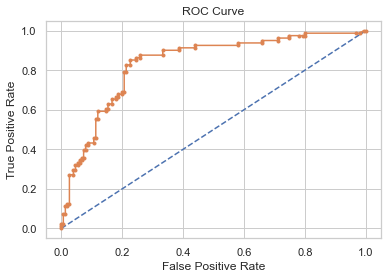

In [50]:
# Plotting the ROC curve
prob = rfc2.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_rfc = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_rfc)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");

### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(random_state=77)  

In [52]:
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=77)

In [53]:
y_pred = dtc1.predict(x_test)

In [54]:
dtc1.score(x_test,y_test)

0.683982683982684

In [55]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [56]:
param_grid2 = {
    'criterion':['gini','entropy'],
    'splitter':['best'],
    'max_depth':[list(range(1,9,1)),None],
    'min_samples_split':[1,3,5,7],
    'min_samples_leaf':[1,3,5,7],
    'max_features':['auto'],
    'min_impurity_split':[1,3,5,7]}

In [57]:
dtc_gs = GridSearchCV(estimator=dtc1, param_grid=param_grid2, cv=5, verbose=2)
dtc_gs.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=1, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 

[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=1, min_samples_l

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anirudhagarwal/opt/anaconda3/lib/python3.

[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_leaf=5, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_leaf=5, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=5, min_samples_l

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 285, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'list' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: 

[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anirudhagarwal/opt/anaconda3/lib/python3.

[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_impurity_split=5, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.w

[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_spli

[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_spli

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 285, in fit
    if max_depth <= 0:
TypeError: '<=' not supported between instances of 'list' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: 

[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=7, min_samples_leaf=5, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=7, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=7, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=7, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_split=7, min_samples_leaf=7, min_samples_split=1, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=[1, 2, 3, 4, 5, 6, 7, 8], max_features=auto, min_impurity_spli

[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=No

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anirudhagarwal/opt/anaconda3/lib/python3.

[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_impurity_split=3, min_samples_leaf=7, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=No

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.w

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=77),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [[1, 2, 3, 4, 5, 6, 7, 8], None],
                         'max_features': ['auto'],
                         'min_impurity_split': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 7],
                         'splitter': ['best']},
             verbose=2)

In [58]:
dtc_gs.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_impurity_split': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [59]:
dtc2 = DecisionTreeClassifier(criterion='gini',max_features='auto',min_impurity_split=1,min_samples_leaf=1,min_samples_split=3,splitter='best')

In [60]:
dtc2.fit(x_train,y_train)

/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


DecisionTreeClassifier(max_features='auto', min_impurity_split=1,
                       min_samples_split=3)

In [61]:
y_pred = dtc2.predict(x_test)

In [62]:
dtc2.score(x_train,y_train)

0.6517690875232774

In [63]:
dtc2.score(x_test,y_test)

0.6493506493506493

In [64]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,150,0
1,81,0


In [65]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anirudhagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

AUC: 0.500


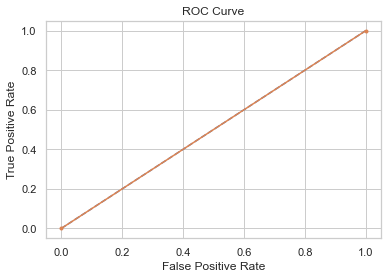

In [66]:
prob = dtc2.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_dtc = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_dtc)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");

### Support Vector Machines Classifier

In [67]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')

In [68]:
svm1.fit(x_train, y_train)

SVC()

In [69]:
svm1.score(x_train, y_train)

0.8156424581005587

In [70]:
svm1.score(x_test, y_test)

0.7532467532467533

In [71]:
param_grid3 = {
    'C':[1, 5, 10, 15, 20, 25,30,35,40],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [72]:
svm_gs = GridSearchCV(estimator=svm1, param_grid=param_grid3, cv=5, verbose=0)
svm_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [73]:
svm_gs.best_params_

{'C': 40, 'gamma': 0.005}

In [74]:
svm2 = SVC(kernel='rbf', C=40, gamma=0.005, probability=True)

In [75]:
svm2.fit(x_train,y_train)

SVC(C=40, gamma=0.005, probability=True)

In [76]:
svm2.score(x_train,y_train)

0.770949720670391

In [77]:
y_pred = svm2.predict(x_test)

In [78]:
svm2.score(x_test,y_test)

0.7532467532467533

In [79]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       150
           1       0.77      0.42      0.54        81

    accuracy                           0.75       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.76      0.75      0.73       231



In [80]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,140,10
1,47,34


AUC: 0.831


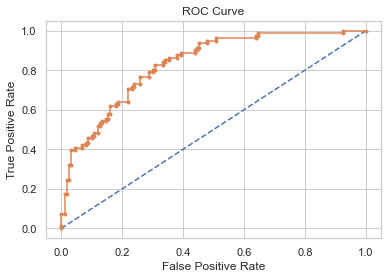

In [81]:
prob = svm2.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_svm = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");

### Naive Bayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nbc = GaussianNB()

In [84]:
nbc.fit(x_train,y_train)

GaussianNB()

In [85]:
y_pred = nbc.predict(x_test)

In [86]:
nbc.score(x_train,y_train)

0.7467411545623837

In [87]:
nbc.score(x_test,y_test)

0.7619047619047619

No hyper-parameter tuning for Naive Bayes, as there are no critical parameters to optimise

In [88]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       150
           1       0.71      0.54      0.62        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [89]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,132,18
1,37,44


AUC: 0.836


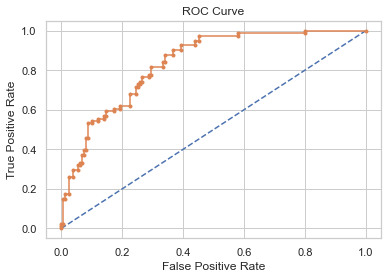

In [90]:
prob = nbc.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_nbc = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_nbc)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [92]:
lr.fit(x_train,y_train)

LogisticRegression()

In [93]:
lr.score(x_train,y_train)

0.7783985102420856

In [94]:
lr.score(x_test, y_test)

0.7532467532467533

In [95]:
y_pred = lr.predict(x_test)

No hyper-parameter tuning for Logistic Regression, as there are no critical parameters to optimise

In [96]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,140,10
1,47,34


In [97]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       150
           1       0.77      0.42      0.54        81

    accuracy                           0.75       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.76      0.75      0.73       231



AUC: 0.837


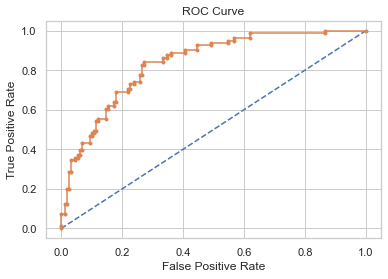

In [98]:
prob = lr.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_lr = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");

### K-Nearest Neighbour (KNN) Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()

In [100]:
knn1.fit(x_train, y_train)

KNeighborsClassifier()

In [101]:
knn1.score(x_train,y_train)

0.8379888268156425

In [102]:
knn1.score(x_test,y_test)

0.7619047619047619

In [103]:
param_grid4 = {
    'n_neighbors': list(range(1,20,1))
}

In [104]:
knn_gs = GridSearchCV(estimator=knn1, param_grid=param_grid4, cv=5, verbose=0)
knn_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [105]:
knn_gs.best_params_

{'n_neighbors': 12}

In [106]:
knn2 = KNeighborsClassifier(n_neighbors=12)

In [107]:
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [108]:
knn2.score(x_train,y_train)

0.8026070763500931

In [109]:
y_pred = knn2.predict(x_test)

In [110]:
pd.DataFrame(cm(y_test,y_pred))

,0,1
0,139,11
1,46,35


In [111]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       150
           1       0.76      0.43      0.55        81

    accuracy                           0.75       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.75      0.75      0.73       231



AUC: 0.823


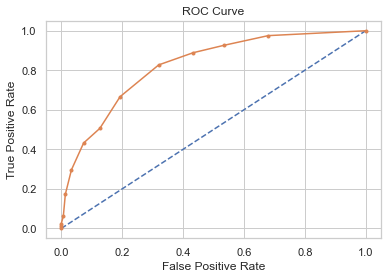

In [112]:
prob = knn2.predict_proba(x_test)                
prob = prob[:, 1]                             
auc_knn = roc_auc_score(y_test, prob)           
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, prob)  
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve");